# Store Location Analysis Using Heatmaps

Each heatmap gives a different perspective on customer behavior and demographics. Explanations are in simple English.

In [15]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Load the customer data
df = pd.read_csv("../project/Customers3_oversampled.csv")

## 1. Correlation Heatmap
Shows how different numeric features (like age, purchase amount, previous purchases) are related. High correlation means the features move together.

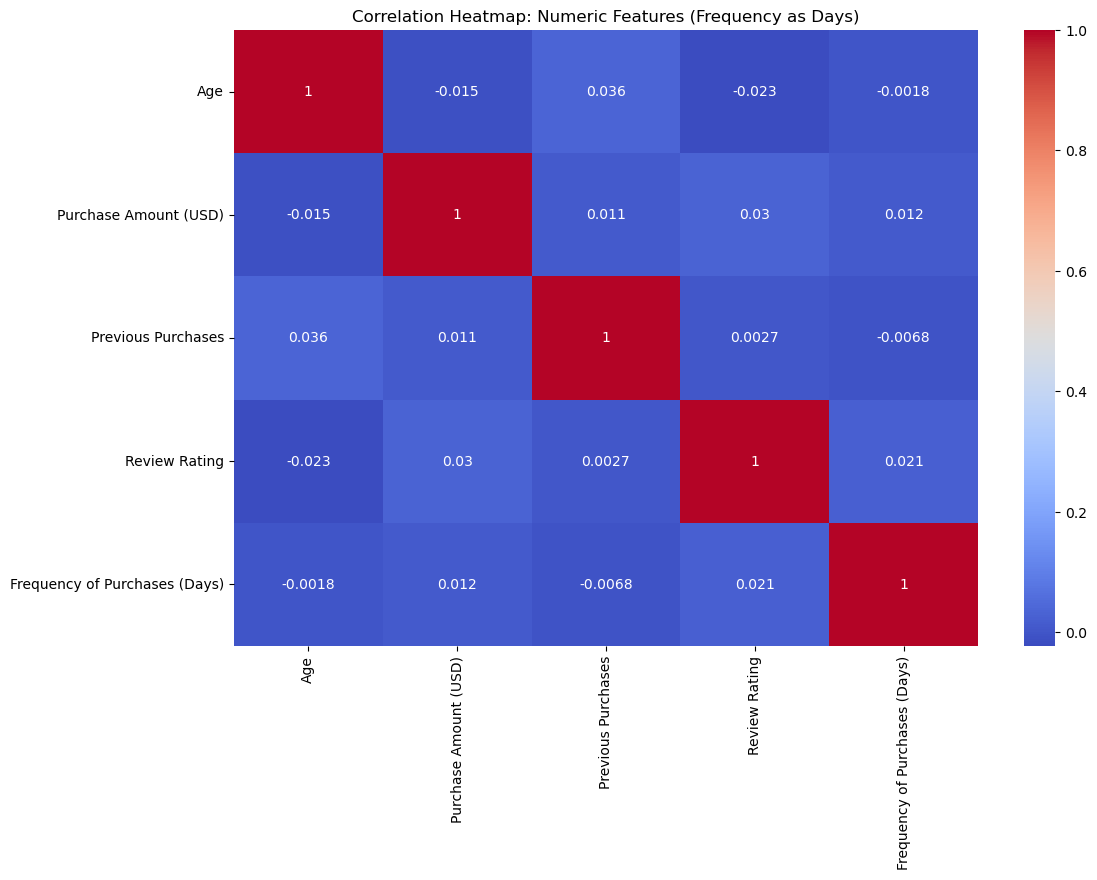

In [17]:

# Convert 'Frequency of Purchases' into numeric values (days)
freq_map = {
    'Weekly': 7,
    'Bi-Weekly': 14,
    'Fortnightly': 14,
    'Monthly': 30,
    'Quarterly': 90,
    'Annually': 365,
    'Every 3 Months': 90
}
df['Frequency of Purchases (Days)'] = df['Frequency of Purchases'].map(freq_map)

# Calculate the correlation including the new numeric column.
cols = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Review Rating", "Frequency of Purchases (Days)"]
df_corr = df[cols].apply(pd.to_numeric, errors='coerce')
corr = df_corr.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Numeric Features (Frequency as Days)")
plt.show()



## 2. Clustered Heatmap
Groups locations with similar purchase behavior. Helps find states where customers spend and buy more.

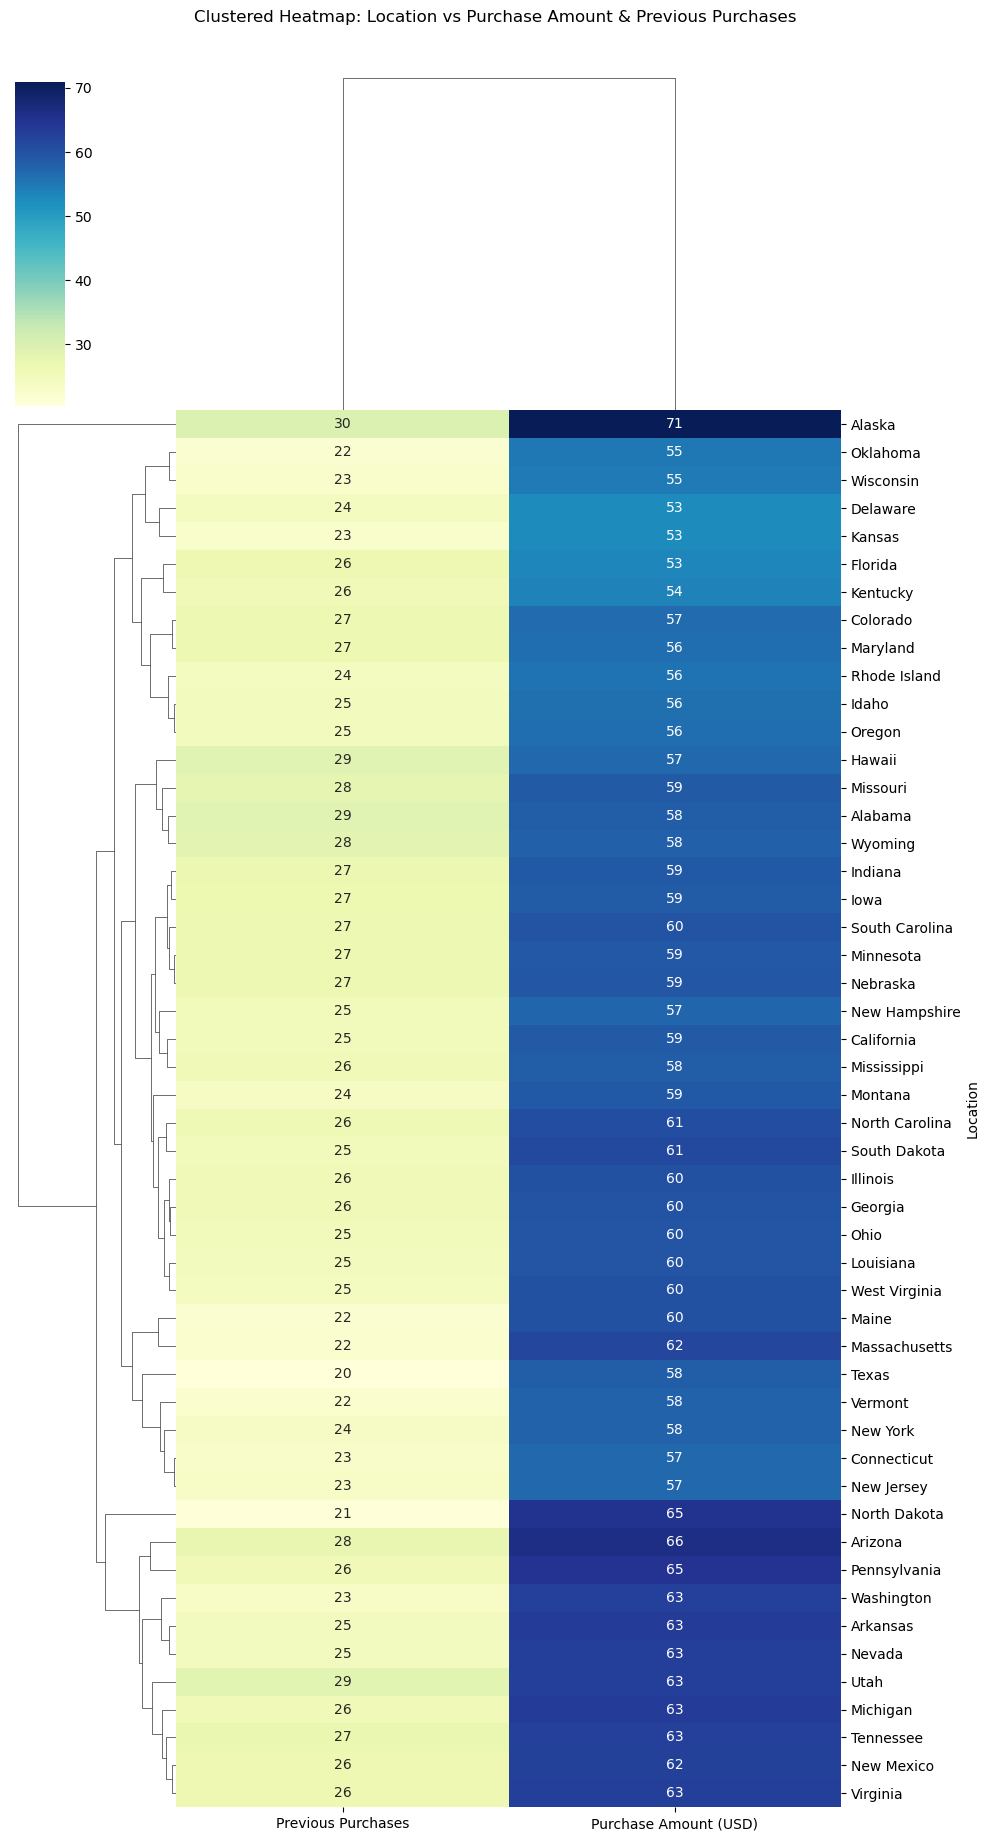

In [18]:
pivot1 = df.pivot_table(index="Location", values=["Purchase Amount (USD)", "Previous Purchases"], aggfunc="mean")
sns.clustermap(pivot1, annot=True, cmap='YlGnBu', figsize=(10,18))
plt.suptitle("Clustered Heatmap: Location vs Purchase Amount & Previous Purchases", y=1.02)
plt.show()


Top states to consider for opening a new store:

* Alaska
* Pennsylvania
* Connecticut
* Louisiana
* Colorado
* Maine
* Minnesota
* Kentucky
* Hawaii
* Texas
* Montana

These states have the highest average purchase amounts and previous purchases according to your data. Montana is also a strong candidate, especially if your goal is to reach young women, attract new customers, and build loyalty.

Open the new store in one of these states (especially Alaska, Pennsylvania, Connecticut, Louisiana, Colorado, Texas, or Montana) to maximize sales and customer engagement.



## 3. Gender Distribution Heatmap (Diverging Palette)
Shows which locations have more female or male customers. Useful for brands targeting young women.

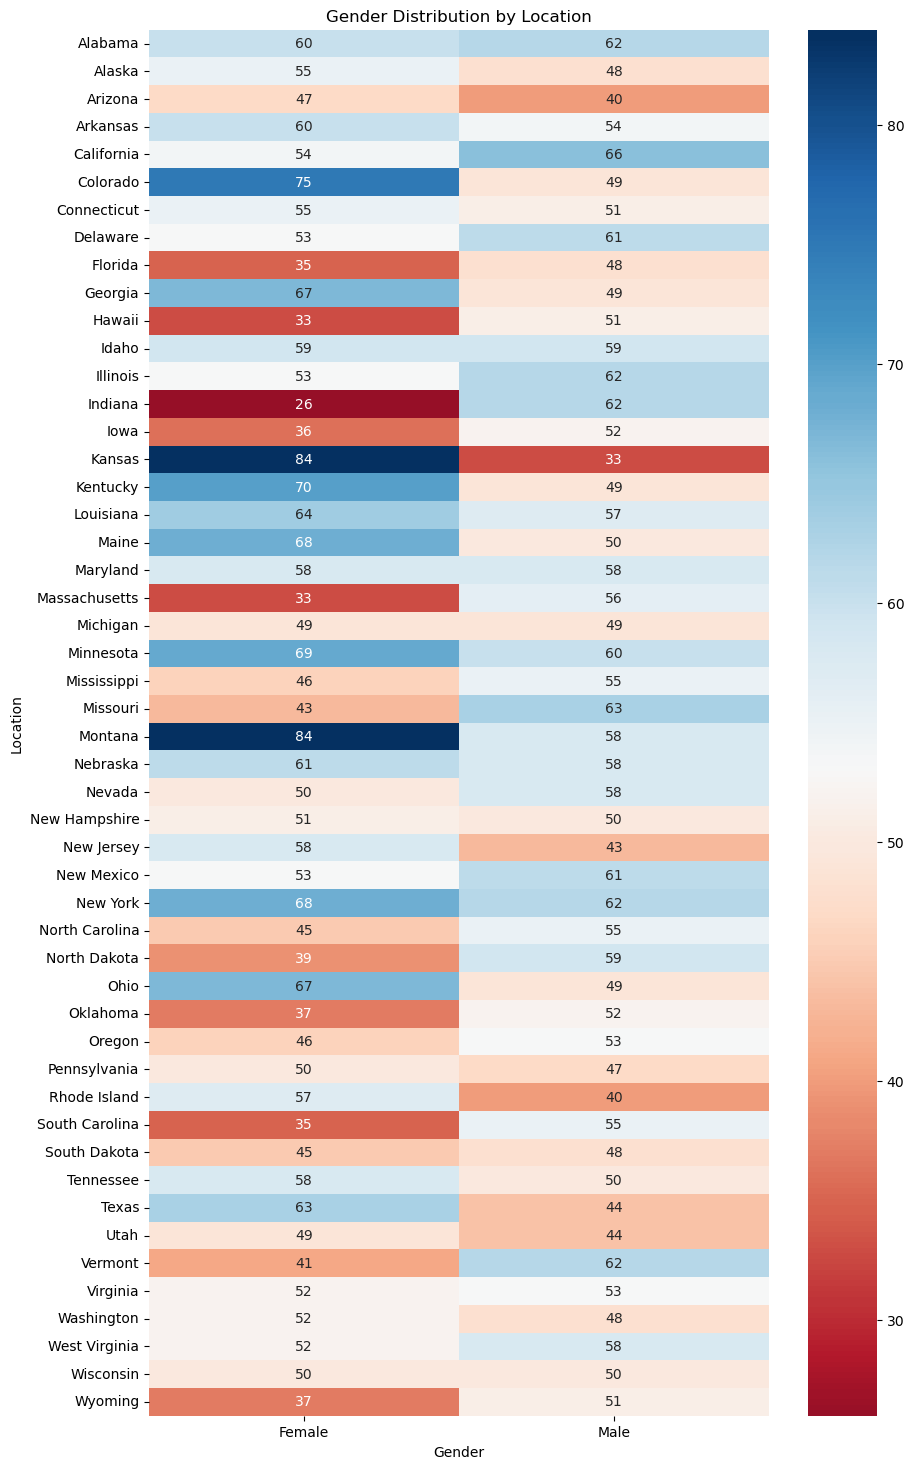

In [ ]:
pivot2 = df.pivot_table(index="Location", columns="Gender", values="Customer ID", aggfunc="count", fill_value=0)
plt.figure(figsize=(10,18))
sns.heatmap(pivot2, annot=True, cmap='RdBu', center=pivot2.values.mean())
plt.title("Gender Distribution by Location")
plt.show()


States with darker blue in the "Female" column like: 

* Colorado, 
* Kansas, 
* Montana, 
* Nebraska, 
* Maine, 
* New York 

Have a higher number of female customers.

## 4. Subscription Status Heatmap (Categorical Palette)
Shows where customers are more engaged (subscribed). More subscriptions mean more loyal customers.

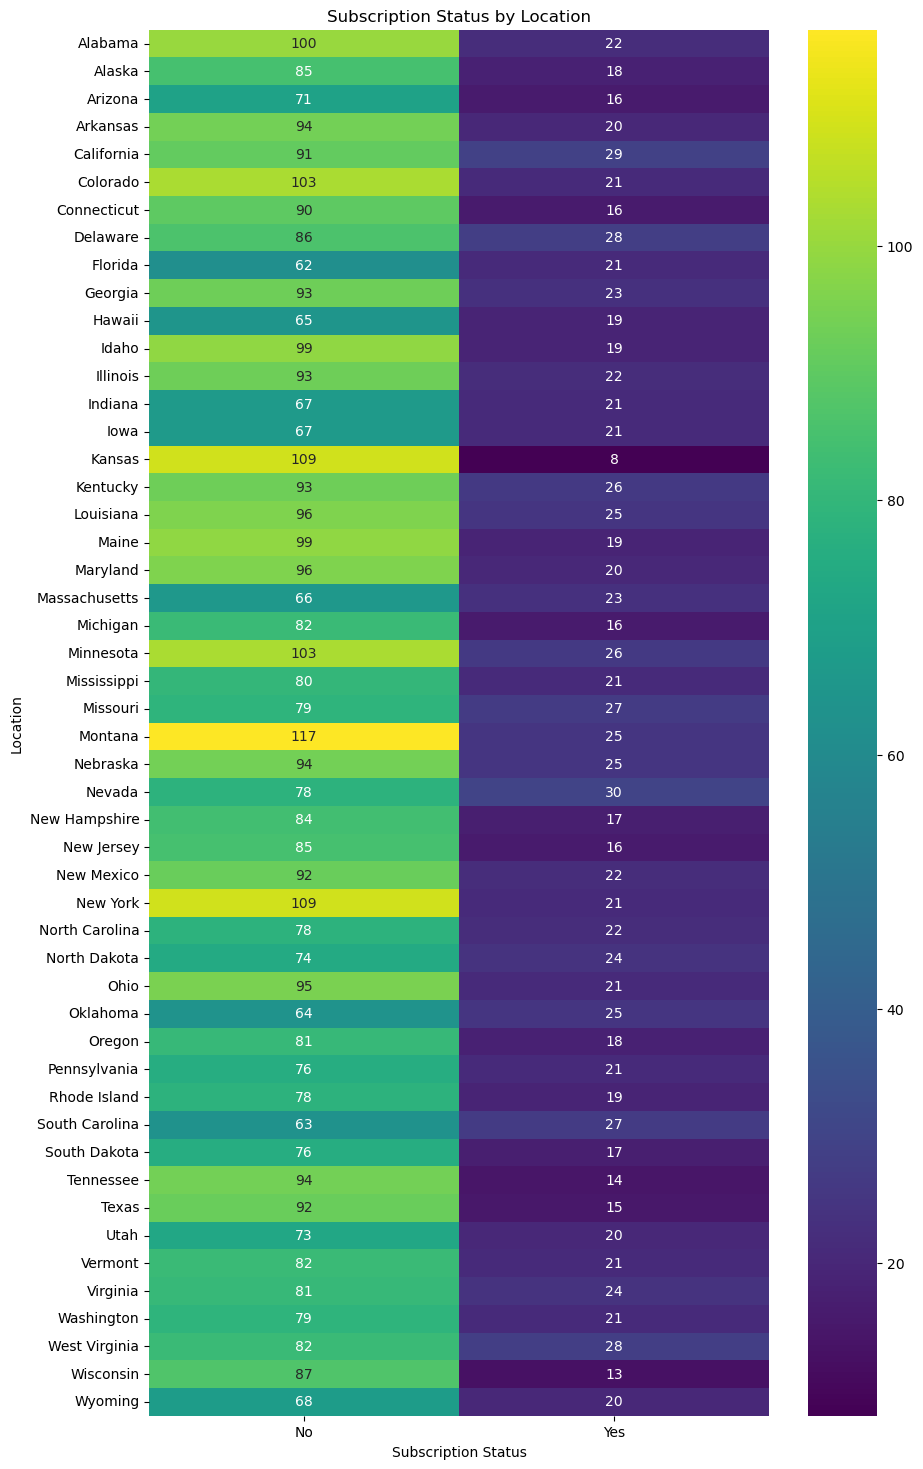

In [27]:
pivot4 = df.pivot_table(index="Location", columns="Subscription Status", values="Customer ID", aggfunc="count", fill_value=0)
plt.figure(figsize=(10,18))
sns.heatmap(pivot4, annot=True, fmt='d', cmap='viridis')
plt.title("Subscription Status by Location")
plt.show()

Customers who are not subscribed. These states represent strong opportunities to attract new customers and grow your subscriber base.

* Montana, 
* Kansas,
* New York, 
* Colorado, 
* Minnesota, 
* Alabama, 
* Maine
